# Aula 1 - Gráficos com Pandas

Prof. Tiago Dias

[Linkedin](https://www.linkedin.com/in/diasctiago/) | [Github](https://github.com/diasctiago) | [Blog](https://www.dadosaocubo.com/)

### Documentações

[Documentação Pandas Plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Pandas Plot

In [1]:
# Instalando a biblioteca
!pip install pandas

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1056)'))) - skipping


In [2]:
# importando a biblioteca
import pandas as pd
import seaborn as sns

In [3]:
# verificando as base disponíveis no seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
# importando algumas bases de dados
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


#### Gráfico de Barras

* Comparativo entre dados categóricos
* Comparativos mensais e anuais
* Exemplo: Comparar o total de vendas por estado

In [8]:
 # quantidade de pinguins por ilha
penguins['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

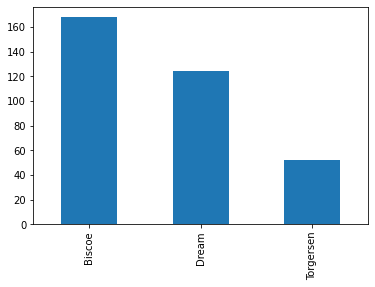

In [9]:
 # listando em gráfico de barras
penguins['island'].value_counts().plot.bar();

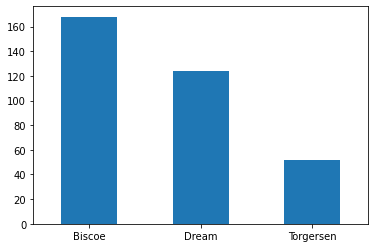

In [10]:
 # listando em gráfico de barras
penguins['island'].value_counts().plot.bar(rot=0);

In [11]:
# agrupando os dados por ilha e sexo
penguins.groupby(['island','sex'])[['sex']].count()

sex
island    sex        
Biscoe    Female   80
          Male     83
Dream     Female   61
          Male     62
Torgersen Female   24
          Male     23

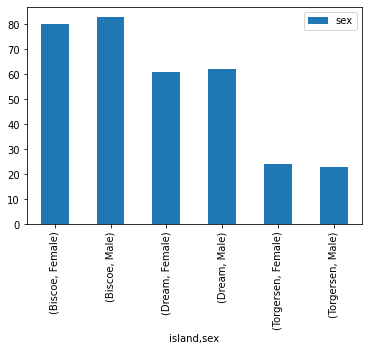

In [12]:
 # listando agrupammento em gráfico de barras
penguins.groupby(['island','sex'])[['sex']].count().plot.bar();

In [13]:
# ajustando a coluna de sexo para transformar as linhas em colunas
pd.get_dummies(penguins, columns=['sex'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,0


In [14]:
# agrupando os dados novamente por ilha e sexo
pd.get_dummies(penguins, columns=['sex']).groupby(['island']).sum()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male
island,,,,,,
Biscoe,7558.0,2651.1,35021.0,787575.0,80,83
Dream,5476.8,2274.7,23941.0,460400.0,61,62
Torgersen,1986.5,939.9,9751.0,189025.0,24,23


In [15]:
# agrupando os dados novamente por ilha e sexo somente os dados de contagem
pd.get_dummies(penguins, columns=['sex'])\
  .groupby(['island'])\
  .sum()[['sex_Female','sex_Male']]

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


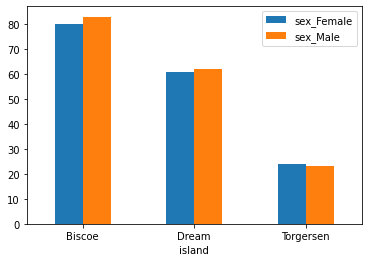

In [16]:
# listando agrupammento em gráfico de barras
pd.get_dummies(penguins, columns=['sex'])\
  .groupby(['island'])\
  .sum()[['sex_Female','sex_Male']]\
  .plot.bar(rot=0);

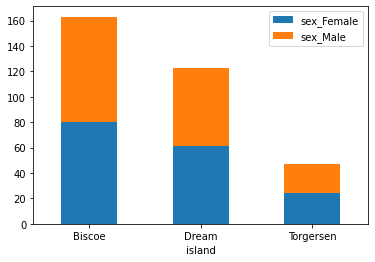

In [17]:
 # listando agrupammento em gráfico de barras empilhadas
pd.get_dummies(penguins, columns=['sex'])\
  .groupby(['island'])\
  .sum()[['sex_Female','sex_Male']]\
  .plot.bar(rot=0, stacked=True);

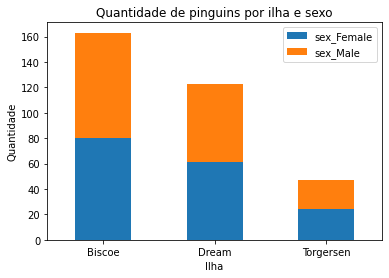

In [18]:
# Ajustando labels e legendas
g1 = pd.get_dummies(penguins, columns=['sex'])\
      .groupby(['island'])\
      .sum()[['sex_Female','sex_Male']]\
      .plot.bar(rot=0, stacked=True)
g1.set_title('Quantidade de pinguins por ilha e sexo')
g1.set_xlabel('Ilha')
g1.set_ylabel('Quantidade');

#### Gráfico de Linhas

* Evolução de um atributo no tempo
* Demonstrar sequência de um valor durante anos, meses, semanas ou dias
* Exemplo: Vendas durante os meses de um determinado ano


In [19]:
# revisão pivot
temperatura = pd.DataFrame([['jan','max',29],
                            ['jan','min',22],
                            ['fev','max',33],
                            ['fev','min',25],
                            ['mai','max',27],
                            ['mai','min',21]
                            ], columns=['mes','temp','val'])

In [20]:
# revisão pivot
temperatura

,mes,temp,val
0,jan,max,29
1,jan,min,22
2,fev,max,33
3,fev,min,25
4,mai,max,27
5,mai,min,21


In [21]:
# revisão pivot
temperatura.pivot('mes','temp','val')

temp,max,min
mes,,
fev,33,25
jan,29,22
mai,27,21


In [22]:
# revisão pivot
temperatura.pivot('mes','temp','val').info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, fev to mai
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   max     3 non-null      int64
 1   min     3 non-null      int64
dtypes: int64(2)
memory usage: 72.0+ bytes


In [23]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


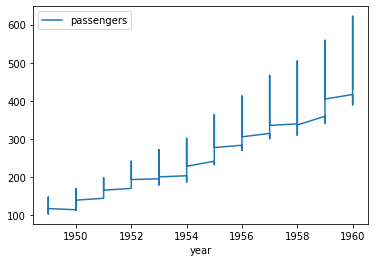

In [24]:
# listando em gráfico de linha por ano e passageiro
flights.plot.line(x='year', y='passengers');

In [25]:
# verificando novamente os dados
flights.groupby(['year']).sum()

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


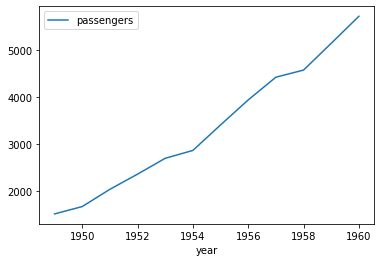

In [26]:
# agrupando os dados por ano
flights.groupby(['year']).sum().plot.line();

In [27]:
# listando em gráfico de linha por ano e passageiro
flights.pivot('year', 'month', 'passengers')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [28]:
flights.pivot('month', 'year', 'passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


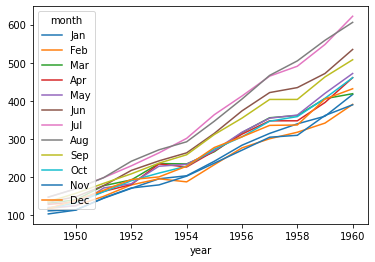

In [29]:
# fazendo um pivot para incluir o mês na anáise
flights.pivot('year', 'month', 'passengers').plot.line();

In [30]:
flights.pivot('year', 'month', 'passengers')[['Jan','Feb','May']]

month,Jan,Feb,May
year,,,
1949,112,118,121
1950,115,126,125
1951,145,150,172
1952,171,180,183
1953,196,196,229
1954,204,188,234
1955,242,233,270
1956,284,277,318
1957,315,301,355


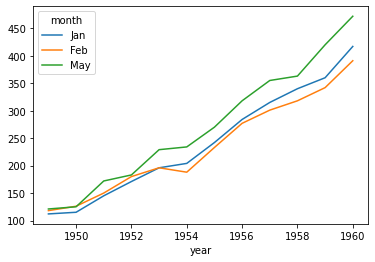

In [31]:
# listando em gráfico de linha por ano e passageiro quebrando por mês
flights.pivot('year', 'month', 'passengers')[['Jan','Feb','May']].plot.line();

#### Gráfico de Área

* Similar ao gráfico de linha
* Evidencia uma noção de proporção sobre o todo com a área desenhada
* Exemplo: Desconto em compras por meses


In [32]:
# trazendo um pivot filtrando alguns meses
flights.pivot('year', 'month', 'passengers')[['Jan','Feb','May']]

month,Jan,Feb,May
year,,,
1949,112,118,121
1950,115,126,125
1951,145,150,172
1952,171,180,183
1953,196,196,229
1954,204,188,234
1955,242,233,270
1956,284,277,318
1957,315,301,355


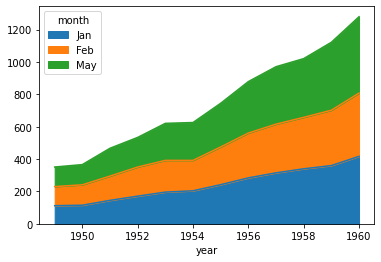

In [33]:
# verificando a análise pelo gráfico de área
flights.pivot('year', 'month', 'passengers')[['Jan','Feb','May']].plot.area();

#### Gráfico de Dispersão

* Visão de comparação entre duas variáveis
* Indica o quantos uma variável pode ou não influenciar a outra
* Exemplo: Tempo de profissão e salário

In [34]:
# verificando os dados novamente
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


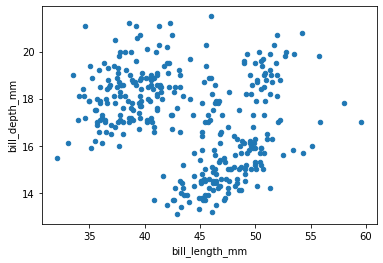

In [35]:
# comparando o tamanho e altura do bico do pinguim
penguins.plot.scatter(x='bill_length_mm',y='bill_depth_mm');

In [36]:
# aplicando um filtro
penguins[penguins['sex']=='Female']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,Female
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female


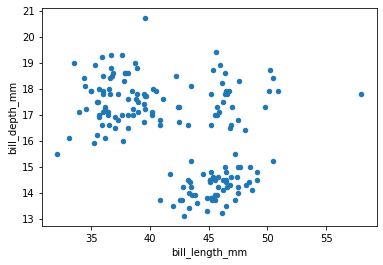

In [37]:
# comparando o tamanho e altura do bico do pinguim com filtro
penguins[penguins['sex']=='Female']\
  .plot.scatter(x='bill_length_mm',y='bill_depth_mm');

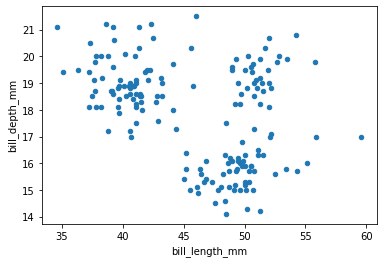

In [38]:
# comparando o tamanho e altura do bico do pinguim com outro filtro
penguins[penguins['sex']=='Male']\
  .plot.scatter(x='bill_length_mm',y='bill_depth_mm');

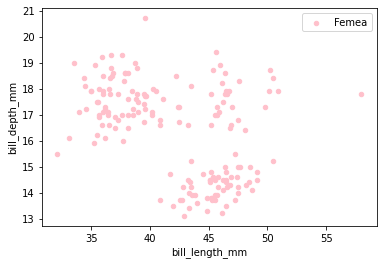

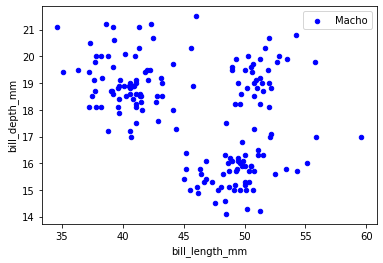

In [39]:
# juntando os dois gráficos
g1 = penguins[penguins['sex']=='Female']\
      .plot.scatter(x='bill_length_mm',
                    y='bill_depth_mm',
                    c='pink',
                    label='Femea');
g2 = penguins[penguins['sex']=='Male']\
      .plot.scatter(x='bill_length_mm',
                    y='bill_depth_mm',
                    c='blue',
                    label='Macho');

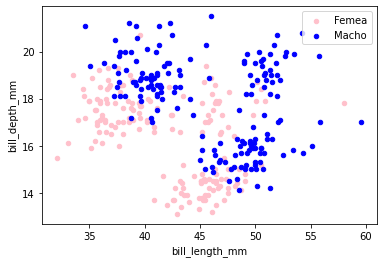

In [40]:
# juntando os dois gráficos
g1 = penguins[penguins['sex']=='Female']\
      .plot.scatter(x='bill_length_mm',
                    y='bill_depth_mm',
                    c='pink',
                    label='Femea');
g2 = penguins[penguins['sex']=='Male']\
      .plot.scatter(x='bill_length_mm',
                    y='bill_depth_mm',
                    c='blue',
                    label='Macho',
                    ax=g1);

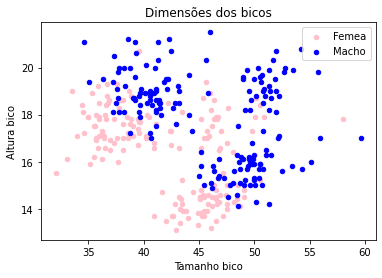

In [41]:
# Ajustando labels e legendas
g1 = penguins[penguins['sex']=='Female']\
      .plot.scatter(x='bill_length_mm',
                    y='bill_depth_mm',
                    c='pink',
                    label='Femea');
g2 = penguins[penguins['sex']=='Male']\
      .plot.scatter(x='bill_length_mm',
                    y='bill_depth_mm',
                    c='blue',
                    label='Macho',
                    ax=g1)
g2.set_title('Dimensões dos bicos')
g2.set_xlabel('Tamanho bico')
g2.set_ylabel('Altura bico');

#### Gráfico de Pizza

* Visão de um atributo comparado com o todo
* É o valor relativo de cada categoria analizada
* Exemplo: Proporção de vendas por produto


In [42]:
 # verificando a quantidade de pinguins por ilha
penguins['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

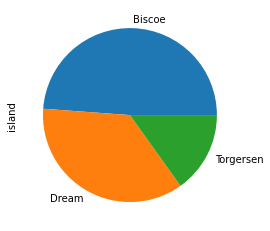

In [43]:
 # visualizando a quatidade de pinguins por ilha em uma pizza
penguins['island'].value_counts().plot.pie();

In [44]:
# agrupando os dados por ilha e sexo com quantidade de pinguins
pd.get_dummies(penguins, columns=['sex'])\
  .groupby(['island']).sum()[['sex_Female','sex_Male']]

,sex_Female,sex_Male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


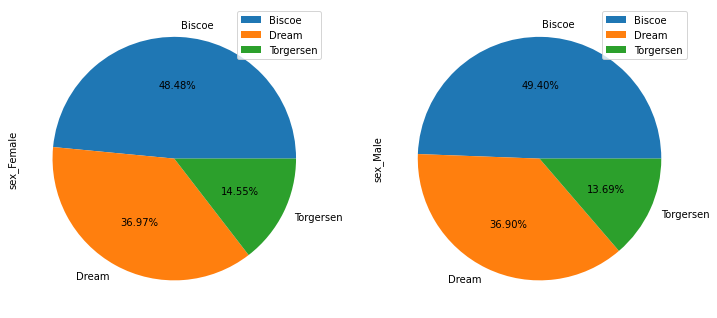

In [45]:
# visualizando a quatidade de pinguins por ilha em pizzas separadas por sexo
pd.get_dummies(penguins, columns=['sex'])\
  .groupby(['island']).sum()[['sex_Female','sex_Male']]\
  .plot.pie(subplots=True, figsize=(12,6), autopct='%1.2f%%');

#### Gráfico de Caixa

* Visão de distribuição de uma variável
* Identificação de outliers
* Apresenta algumas respostas importantes sobre o dado em análise
* Exemplo: A distribuição dos salários em uma empresa

In [46]:
# verificando a base de dados dos pinguins
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


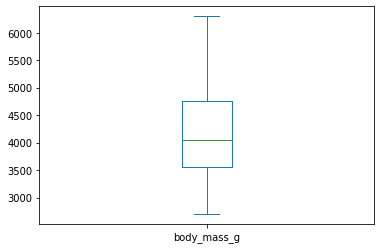

In [47]:
# verificando o boxplot de uma coluna
penguins['body_mass_g'].plot.box();

In [48]:
# consultando valores nulo
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [49]:
# separando o peso por sexo
penguins[['body_mass_g','sex']]\
  .dropna()\
  .reset_index()\
  .pivot('index','sex','body_mass_g')

sex,Female,Male
index,,
0,NaN,3750.0
1,3800.0,NaN
2,3250.0,NaN
4,3450.0,NaN
5,NaN,3650.0
...,...,...
338,4925.0,NaN
340,4850.0,NaN
341,NaN,5750.0


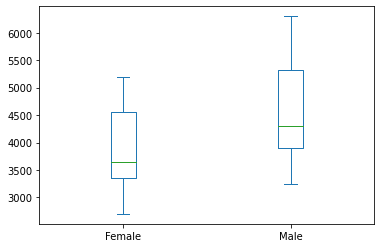

In [50]:
# visualizando o boxplot separado por sexo
penguins[['body_mass_g','sex']]\
  .dropna()\
  .reset_index()\
  .pivot('index','sex','body_mass_g')\
  .plot.box();

#### Histograma

* Visão de distribuição de uma variável
* Analisa a frequência/quantidade de uma coluna
* Similar ao gráfico de coluna, mas busca responder perguntas sobre a distribuição
* Exemplo: Faixa etária dos inscritos no enem 

In [51]:
# verificando o tamanho das nadadeiras
penguins['flipper_length_mm']

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64

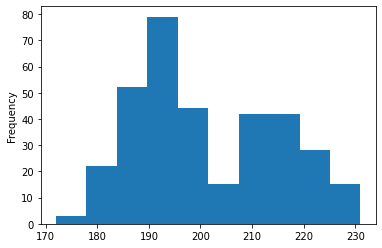

In [52]:
# exibindo em um histograma
penguins['flipper_length_mm'].plot.hist();

In [53]:
# separando o tamanho das nadadeiras por sexo
penguins[['flipper_length_mm','sex']]\
  .dropna()\
  .reset_index()\
  .pivot('index','sex','flipper_length_mm')

sex,Female,Male
index,,
0,NaN,181.0
1,186.0,NaN
2,195.0,NaN
4,193.0,NaN
5,NaN,190.0
...,...,...
338,214.0,NaN
340,215.0,NaN
341,NaN,222.0


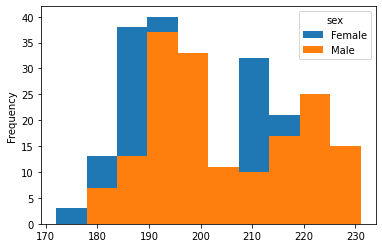

In [54]:
# visualizando no histograma o tamanho das nadadeiras por sexo
penguins[['flipper_length_mm','sex']]\
  .dropna()\
  .reset_index()\
  .pivot('index','sex','flipper_length_mm')\
  .plot.hist();

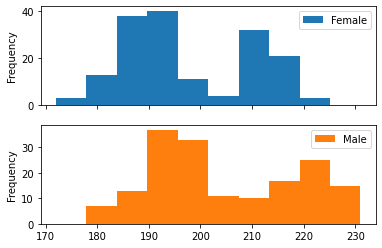

In [55]:
# visualizando no histograma o tamanho das nadadeiras por sexo separados
penguins[['flipper_length_mm','sex']]\
  .dropna()\
  .reset_index()\
  .pivot('index','sex','flipper_length_mm')\
  .plot.hist(subplots=True);

### Atividade

Resolver as questões abaixo. Em seguida, criar um repositório público no GitHub e armazenar no notebook criado, enviando somente o link do NOTEBOOK para o [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSeahbxqxAmgtt2p_gB9V64XbPnScFoCIYzt3dGFj6uZ5MoW4Q/viewform?usp=sf_link).

Para resolver as questões abaixo utilizar o dataset [Titanic](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv).

#### Questão 1

In [56]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset.

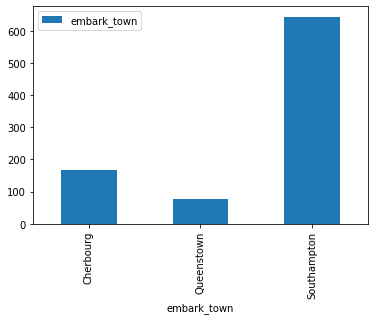

In [57]:
titanic.groupby(['embark_town'])[['embark_town']].count().plot.bar();

#### Questão 2

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset separados pelo sexo, coluna sex no dataset.

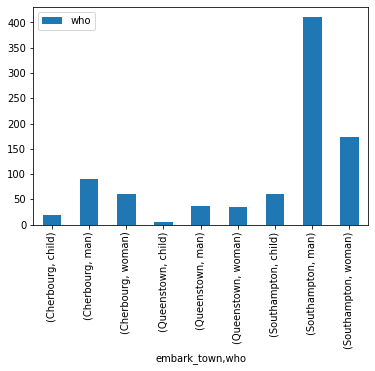

In [58]:
titanic.groupby(['embark_town','who'])[['who']].count().plot.bar();

#### Questão 3

Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

In [59]:
pd.get_dummies(titanic, columns=['who'])\
  .groupby(['embark_town']).sum()[['who_woman','who_man']]

,who_woman,who_man
embark_town,,
Cherbourg,60.0,90.0
Queenstown,35.0,37.0
Southampton,174.0,410.0


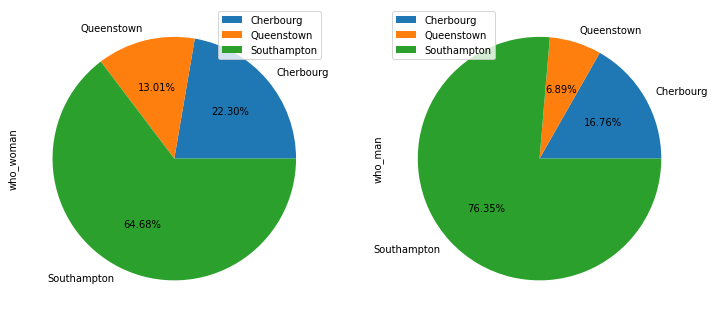

In [60]:
pd.get_dummies(titanic, columns=['who'])\
  .groupby(['embark_town']).sum()[['who_woman','who_man']]\
  .plot.pie(subplots=True, figsize=(12,6), autopct='%1.2f%%');

#### Questão 4

Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

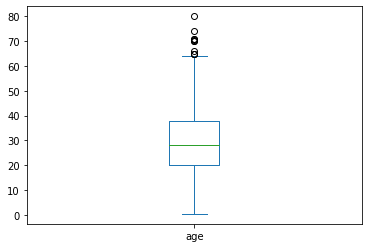

In [61]:
titanic['age'].plot.box();

#### Questão 5

Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

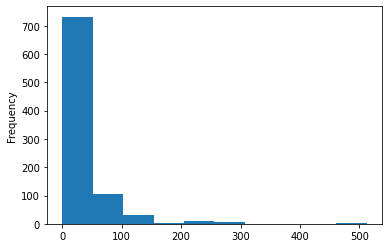

In [62]:
titanic['fare'].plot.hist();

#### Questão 6

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

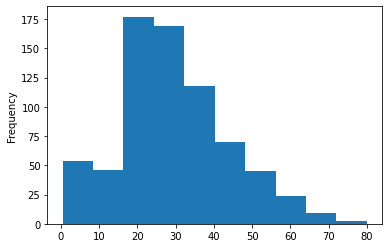

In [63]:
titanic['age'].plot.hist();

#### Questão 7

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.

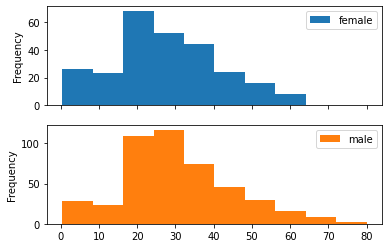

In [66]:
titanic[['age','sex']]\
  .dropna()\
  .reset_index()\
  .pivot('index', 'sex','age')\
  .plot.hist(subplots = True);